# real world examples

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
palette = 'muted'
sns.set_palette(palette)
sns.set_color_codes(palette)

In [3]:
data = pd.read_csv('../../data/export/DXY_PRICES_DAILY.csv', index_col=0, parse_dates=True)
data['chgo'] = data['o'].pct_change() * 100
data['chgh'] = data['h'].pct_change() * 100
data['chgl'] = data['l'].pct_change() * 100
data['chgav'] = data['av'].pct_change() * 100
data['chgme'] = data['me'].pct_change() * 100
data['chgty'] = data['ty'].pct_change() * 100
data['chgwc'] = data['wc'].pct_change() * 100
data.dropna(inplace=True)
data = data.round(2)
data

,c,o,h,l,av,me,ty,wc,chg,chgo,chgh,chgl,chgav,chgme,chgty,chgwc
time,,,,,,,,,,,,,,,,
2007-01-03,83.92,83.27,84.04,83.17,83.60,83.60,83.71,83.76,0.87,-0.23,0.51,0.02,0.30,0.26,0.47,0.56
2007-01-04,84.32,83.91,84.39,83.84,84.12,84.12,84.18,84.22,0.48,0.77,0.42,0.81,0.62,0.62,0.56,0.55
2007-01-05,84.63,84.29,84.81,84.15,84.47,84.48,84.53,84.56,0.37,0.45,0.50,0.37,0.42,0.43,0.42,0.40
2007-01-08,84.60,84.64,84.84,84.49,84.64,84.66,84.64,84.63,-0.04,0.42,0.04,0.40,0.20,0.21,0.13,0.08
2007-01-09,84.74,84.49,84.84,84.43,84.62,84.64,84.67,84.69,0.17,-0.18,0.00,-0.07,-0.02,-0.02,0.04,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,106.13,106.11,106.39,105.98,106.15,106.18,106.17,106.16,0.02,-0.01,0.24,-0.09,0.04,0.07,0.06,0.05
2024-04-23,105.68,106.13,106.24,105.61,105.92,105.92,105.84,105.80,-0.42,0.02,-0.14,-0.35,-0.22,-0.24,-0.31,-0.34
2024-04-24,105.81,105.68,105.95,105.59,105.76,105.77,105.78,105.79,0.12,-0.42,-0.27,-0.02,-0.15,-0.14,-0.06,-0.01


In [4]:
data.shape

(4512, 16)

In [5]:
# columns = 'wc'
# # data[columns].describe()
# data[columns].dropna(inplace=True)
# xdata = data[columns].to_numpy()
# mu = np.mean(xdata)
# sd = np.std(xdata)
# x = np.linspace(min(xdata), max(xdata), xdata.size)
# pdf = stats.norm(mu, sd).pdf(x)
# plt.figure(figsize=(10, 6))
# plt.hist(xdata, bins=30, density=True, alpha=0.6, color='g', label='Data histogram')
# plt.plot(x, pdf, 'k', linewidth=2, label='Normal distribution PDF')
# plt.title('PDF of the Data')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.legend(loc='best')
# plt.show()


In [6]:
data.columns

Index(['c', 'o', 'h', 'l', 'av', 'me', 'ty', 'wc', 'chg', 'chgo', 'chgh',
       'chgl', 'chgav', 'chgme', 'chgty', 'chgwc'],
      dtype='object')

In [7]:
data1 = data.iloc[:, :8]

In [8]:
data2 = data.iloc[:, 8:]

In [9]:
# data1.iloc[:, 0].mean(), data1.iloc[:, 0].std(), data1.iloc[:, 0].min(), data1.iloc[:, 0].max(), len(data1.iloc[:, 0])

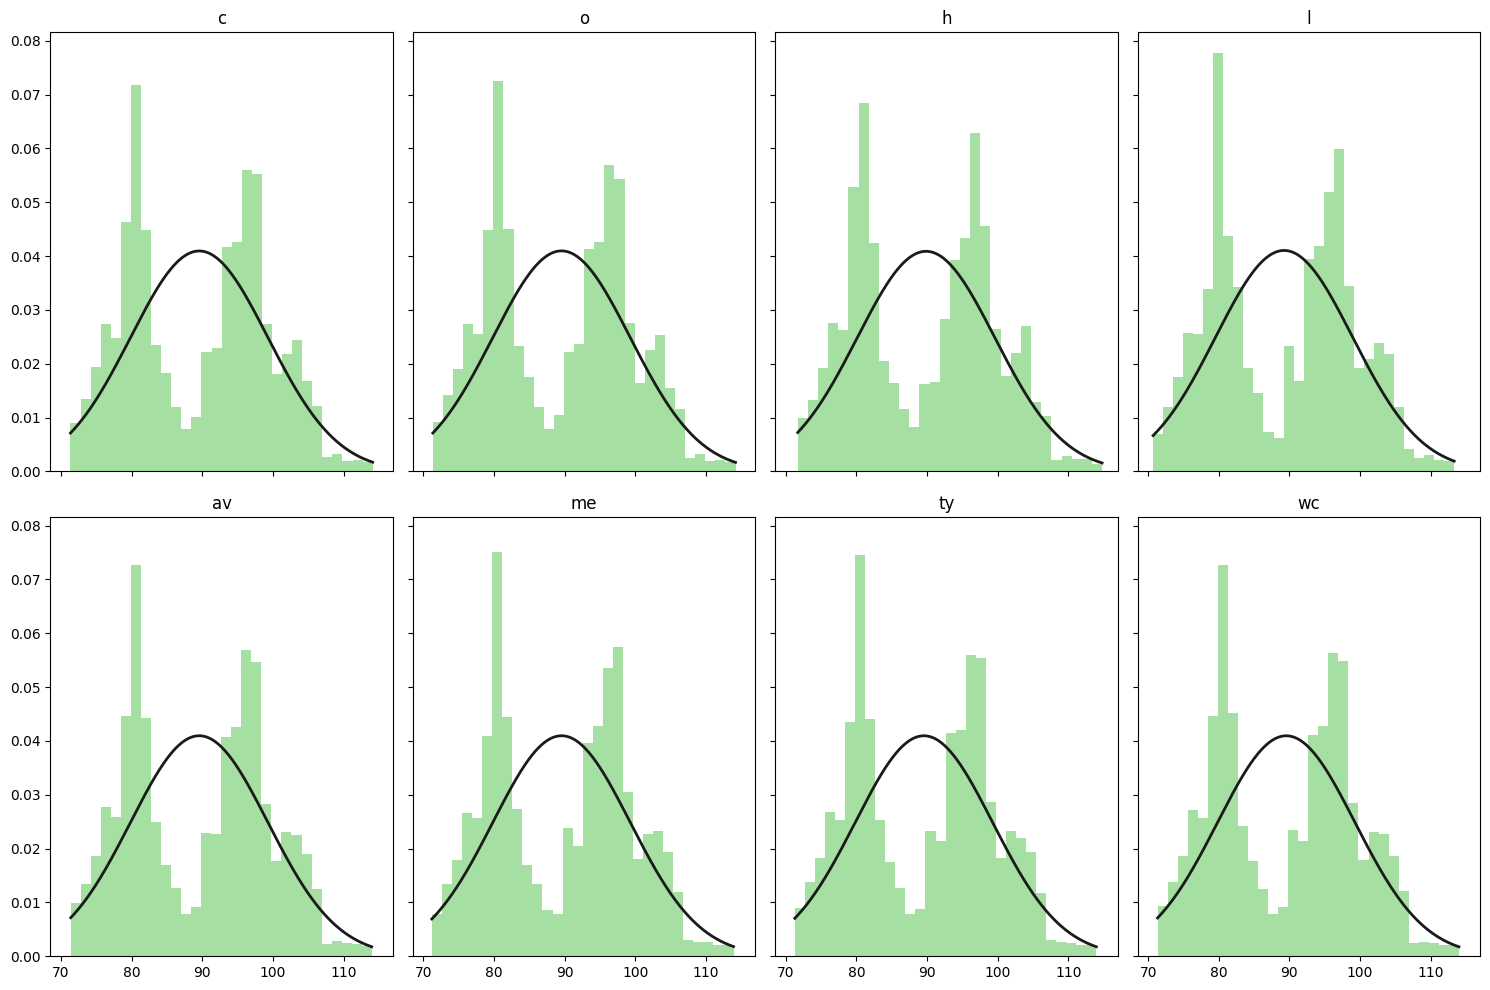

In [10]:
rows, cols = 2, 4
f, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(15, 10))

ax = ax.flatten()

for i in range(len(data1.columns)):
    mu = data1.iloc[:, i].mean()
    sd = data1.iloc[:, i].std()
    
    x = np.linspace(data1.iloc[:, i].min(), data1.iloc[:, i].max(), len(data1.iloc[:, i]))
    
    pdf = stats.norm(mu, sd).pdf(x)
    
    ax[i].hist(data1.iloc[:, i].to_numpy(), bins=30, density=True, alpha=0.6, color='g')
    ax[i].plot(x, pdf, 'k', linewidth=2)
    ax[i].set_title(data1.columns[i])

plt.tight_layout()
plt.show()

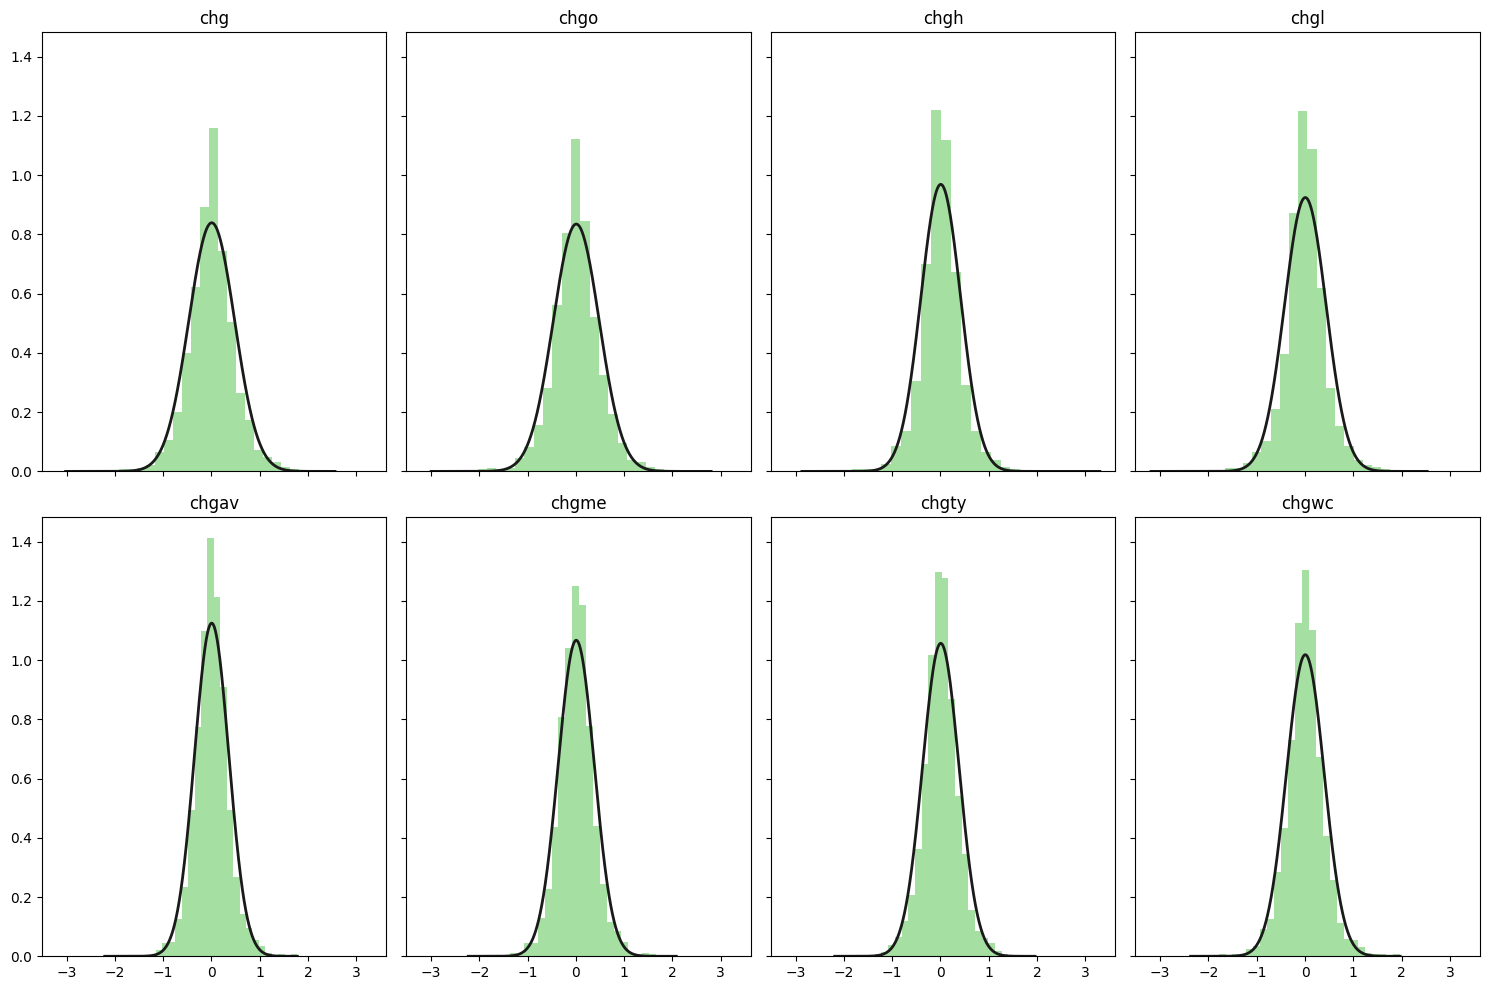

In [11]:
rows, cols = 2, 4
f, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(15, 10))

ax = ax.flatten()

for i in range(len(data2.columns)):
    mu = data2.iloc[:, i].mean()
    sd = data2.iloc[:, i].std()
    
    x = np.linspace(data2.iloc[:, i].min(), data2.iloc[:, i].max(), len(data2.iloc[:, i]))
    
    pdf = stats.norm(mu, sd).pdf(x)
    
    ax[i].hist(data2.iloc[:, i].to_numpy(), bins=30, density=True, alpha=0.6, color='g')
    ax[i].plot(x, pdf, 'k', linewidth=2)
    ax[i].set_title(data2.columns[i])

plt.tight_layout()
plt.show()

In [12]:
datac = data.iloc[-20:, :1]

In [13]:
datac.reset_index(inplace=True)

In [14]:
datacn = datac.to_numpy()

In [15]:
datacn[:,0] = [date.strftime('%Y-%m-%d')  for date in datacn[:,0]]
datacn[:,0]

array(['2024-04-04', '2024-04-05', '2024-04-07', '2024-04-08',
       '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
       '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
       '2024-04-18', '2024-04-19', '2024-04-21', '2024-04-22',
       '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26'],
      dtype=object)

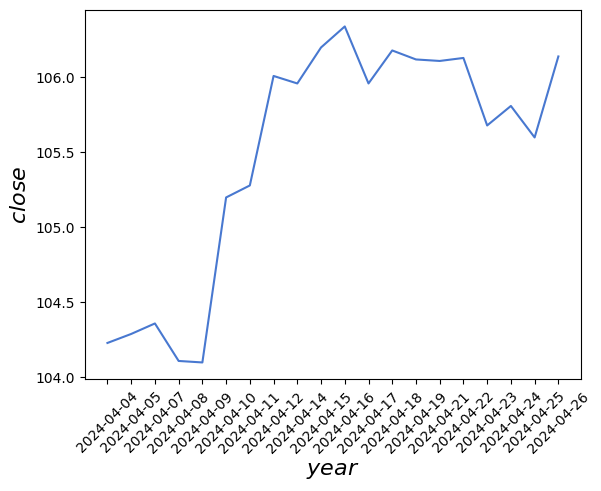

In [16]:
plt.plot(datacn[:,0], datacn[:,1])
plt.xlabel('$year$', fontsize=16)
plt.ylabel('$close$', fontsize=16)
plt.xticks(rotation=45)
plt.show()